In [1]:
from glob import glob

model_result_paths = glob("./data/judgements/*/*/*.json")

In [2]:
eval_dataset_dict = {
    "elyza__ELYZA-tasks-100": "ELYZA-tasks-100",
    "yuzuai__rakuda-questions": "Rakuda",
    "lightblue__tengu_bench": "Tengu-Bench",
    "shisa-ai__ja-mt-bench-1shot": "MT-Bench",
}

In [3]:
import pandas as pd
import os

all_result_dfs = []

for model_result_path in model_result_paths:
    temp_df = pd.read_json(model_result_path, lines=True)
    print(f"Processing {model_result_path} with {len(temp_df)} rows")
    print(model_result_path.split(os.sep))
    temp_df["judge_model"] = model_result_path.split(os.sep)[1]
    temp_df["eval_dataset"] = eval_dataset_dict[model_result_path.split(os.sep)[2]]
    temp_df["model_name"] = model_result_path.split(os.sep)[3].replace(".json", "")
    
    all_result_dfs.append(temp_df)

Processing ./data/judgements\judge_gpt-4.1\elyza__ELYZA-tasks-100\shisa-v2-qwen2.5-32b.json with 100 rows
['./data/judgements', 'judge_gpt-4.1', 'elyza__ELYZA-tasks-100', 'shisa-v2-qwen2.5-32b.json']
Processing ./data/judgements\judge_gpt-4.1\lightblue__tengu_bench\shisa-v2-qwen2.5-32b.json with 120 rows
['./data/judgements', 'judge_gpt-4.1', 'lightblue__tengu_bench', 'shisa-v2-qwen2.5-32b.json']
Processing ./data/judgements\judge_gpt-4.1\shisa-ai__ja-mt-bench-1shot\shisa-v2-qwen2.5-32b.json with 60 rows
['./data/judgements', 'judge_gpt-4.1', 'shisa-ai__ja-mt-bench-1shot', 'shisa-v2-qwen2.5-32b.json']
Processing ./data/judgements\judge_gpt-4.1\yuzuai__rakuda-questions\shisa-v2-qwen2.5-32b.json with 40 rows
['./data/judgements', 'judge_gpt-4.1', 'yuzuai__rakuda-questions', 'shisa-v2-qwen2.5-32b.json']
Processing ./data/judgements\judge_gpt-4o\elyza__ELYZA-tasks-100\shisa-v2-qwen2.5-32b.json with 100 rows
['./data/judgements', 'judge_gpt-4o', 'elyza__ELYZA-tasks-100', 'shisa-v2-qwen2.5-3

In [4]:
import pandas as pd
import json

all_result_dfs = []

for model_result_path in model_result_paths:
    try:
        # Try the standard pandas read_json first
        temp_df = pd.read_json(model_result_path, lines=True)
    except ValueError as e:
        print(f"Error reading {model_result_path}: {e}")
        print("Attempting alternative parsing method...")
        try:
            # Try manual parsing as fallback
            with open(model_result_path, 'r', encoding='utf-8') as f:
                json_lines = []
                for i, line in enumerate(f):
                    try:
                        # Attempt to parse each line individually
                        if line.strip():  # Skip empty lines
                            json_obj = json.loads(line.strip())
                            json_lines.append(json_obj)
                    except json.JSONDecodeError as je:
                        print(f"Error in line {i+1}: {je} - {line[:50]}...")
                # Create dataframe from successfully parsed lines
                if json_lines:
                    temp_df = pd.DataFrame(json_lines)
                else:
                    print(f"Could not parse any lines in {model_result_path}, skipping file")
                    continue
        except Exception as e2:
            print(f"Failed to parse {model_result_path} with alternative method: {e2}")
            continue
    
    # Add metadata columns
    temp_df["judge_model"] = model_result_path.split(os.sep)[1]
    temp_df["eval_dataset"] = eval_dataset_dict[model_result_path.split(os.sep)[2]]
    temp_df["model_name"] = model_result_path.split(os.sep)[3].replace(".json", "")
    
    all_result_dfs.append(temp_df)


In [5]:
import pandas as pd

all_result_df = pd.concat(all_result_dfs)

all_result_df["dataset_category"] = all_result_df["eval_dataset"] + " " + all_result_df["Category"]


In [6]:
eval_dataset_names = all_result_df.eval_dataset.unique()
model_names = all_result_df.model_name.unique()


In [7]:
eval_dataset_names

array(['ELYZA-tasks-100', 'Tengu-Bench', 'MT-Bench', 'Rakuda'],
      dtype=object)

In [8]:
model_names

array(['shisa-v2-qwen2.5-32b'], dtype=object)

In [9]:
all_result_df

,Question,output,eval_aspect,ModelAnswer,score,judge_model,eval_dataset,model_name,Category,Answer,Criteria,id,category,question_id,dataset_category
0,仕事の熱意を取り戻すためのアイデアを5つ挙げてください。,1. 自分の仕事に対する興味を再発見するために、新しい技能や知識を学ぶこと。\n2. カレッ...,- 熱意を取り戻すのではなく、仕事の効率化・スキルアップのような文脈になっていたら1点減点\...,1. **目標設定と達成感**: 仕事を通じて達成したい具体的な目標を設定し、それを小さなス...,5,judge_gpt-4.1,ELYZA-tasks-100,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,クマが海辺に行ってアザラシと友達になり、最終的には家に帰るというプロットの短編小説を書いてく...,クマは、森での生活に飽き飽きし、新しい冒険を求めて海辺に向かった。彼は海に興味があり、そこに...,- クマが海辺に行く\n- クマとアザラシが友達になる\n- 最後に家に帰る\nの3つ要素が...,**海辺の出会い**\n\n森の中で暮らすクマのコロは、いつも同じ場所で過ごしていました。し...,5,judge_gpt-4.1,ELYZA-tasks-100,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,古代ギリシャを学ぶ上で知っておくべきポイントは？,古代ギリシャは、古代文明の中で重要な役割を担った文化であり、西洋文明の原点とされています。主...,- 「独自の文化や哲学、神話が有名です」などのように具体例がない場合は-1点\n- 事実と異...,古代ギリシャを学ぶ上で知っておくべき重要なポイントを以下にまとめます。\n\n**1. 歴史...,5,judge_gpt-4.1,ELYZA-tasks-100,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,以下の説明を読んだユーザーが感じるであろう疑問とは？\n\n大量のゴミの処理にお困りではあり...,ユーザーは以下のような点について疑問を感じる可能性があります。\n\n- ゴミ圧縮機はどれく...,- 疑問になっておらず、説明や回答などになっている場合: -4点 (1点になる)\n- 「ゴ...,この説明を読んだユーザーが感じるであろう疑問は以下の通りです。\n\n1. **具体的なコス...,5,judge_gpt-4.1,ELYZA-tasks-100,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,次に読むべきSFを10冊挙げて,それではSFというジャンルに大きな影響を与えた古典とされるSF小説を読んでみるのはどうでしょ...,- 「読むべき」とあるように小説であるべきで、アバターなどのSF映画だと -2点\n- 実在...,SFのジャンルは非常に幅広く、多様な作品がありますが、ここでは様々なスタイルとテーマを取り入...,2,judge_gpt-4.1,ELYZA-tasks-100,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,東京の昼と夜の銀座を一つの段落で描写してください。昼夜それぞれの光景、音、匂いなどを詳細に記...,NaN,NaN,昼間の銀座は、洗練された都会の息吹が満ち溢れる空間だ。高層ビル群から差し込む陽光が、大理石や...,10,judge_gpt-4o,MT-Bench,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,76.0,writing,NaN,NaN
56,以下の一文で始まるミステリー短編小説を作成してください：「ある晴れた日、公園の桜の木の下で、...,NaN,NaN,**『桜の下の秘密』**\n\nある晴れた日、公園の桜の木の下で、一冊の古い日記が見つかった...,8,judge_gpt-4o,MT-Bench,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,77.0,writing,NaN,NaN
57,ある朝目覚めて、突然自分が忍者になってしまったという設定の短編小説の序章を書いてください。,NaN,NaN,**影に紛れて**\n\n雨が降りしきる夜明け、私はいつものようにベッドから転げ落ちた。\n...,8,judge_gpt-4o,MT-Bench,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,78.0,writing,NaN,NaN
58,最新の日本の太陽光発電技術に関する記事のための、科学的に正確かつ興味を引く見出しを4つ提案し...,NaN,NaN,1. **「次世代パワーソース：日本が開発した高効率ペロブスカイト太陽電池の革新」** \...,9,judge_gpt-4o,MT-Bench,shisa-v2-qwen2.5-32b,NaN,NaN,NaN,79.0,writing,NaN,NaN


In [10]:
eval_corr_results = {}
for eval_dataset_name in eval_dataset_names:
    eval_corr_results[eval_dataset_name] = {}
    for model_name in model_names:
        eval_corr_results[eval_dataset_name][model_name] = all_result_df[(all_result_df.eval_dataset == eval_dataset_name) & (all_result_df.model_name == model_name)].score.mean()

In [11]:
eval_corr_results

{'ELYZA-tasks-100': {'shisa-v2-qwen2.5-32b': np.float64(4.2)},
 'Tengu-Bench': {'shisa-v2-qwen2.5-32b': np.float64(7.4)},
 'MT-Bench': {'shisa-v2-qwen2.5-32b': np.float64(8.733333333333333)},
 'Rakuda': {'shisa-v2-qwen2.5-32b': np.float64(9.125)}}

In [12]:
pd.DataFrame(eval_corr_results).corr().round(4)

,ELYZA-tasks-100,Tengu-Bench,MT-Bench,Rakuda
ELYZA-tasks-100,NaN,NaN,NaN,NaN
Tengu-Bench,NaN,NaN,NaN,NaN
MT-Bench,NaN,NaN,NaN,NaN
Rakuda,NaN,NaN,NaN,NaN


In [13]:
eval_res_df = pd.DataFrame(eval_corr_results)

eval_res_df['ELYZA-tasks-100'] = eval_res_df['ELYZA-tasks-100'] * 2

eval_res_df['mean'] = eval_res_df.mean(axis=1)

eval_res_df = eval_res_df.sort_values(by='mean', ascending=False)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

styled_df = eval_res_df.style.apply(highlight_max, axis=0)
styled_df = styled_df.format("{:.2f}")
styled_df



,ELYZA-tasks-100,Tengu-Bench,MT-Bench,Rakuda,mean
shisa-v2-qwen2.5-32b,8.40,7.40,8.73,9.12,8.41


In [14]:
# Latex形式で出力
# print(eval_res_df.to_latex(float_format="%.4f").replace("__","/").replace("_","\_"))

In [15]:
# 相関を可視化
# cols = eval_res_df.columns

# for c1 in range(len(cols)):
#     for c2 in range(c1, len(cols)):
#         eval_res_df.plot(kind='scatter', x=cols[c1], y=cols[c2], title=f'{cols[c1]} vs {cols[c2]}')

In [16]:
import re
def get_model_size(x):
    # Dictionary for known models with their sizes
    known_models = {
        "openchat__openchat-3.5-0106": 7,
        "CohereForAI__c4ai-command-r-v01": 35,
        # Add more known models as needed
    }
    
    # Check if the model is in our known list
    if x.name in known_models:
        return known_models[x.name]
    
    # Try multiple regex patterns to extract size
    try:
        # Try pattern like "7b" or "13B"
        size_match = re.search(r"\b(\d{1,3})[bB]\b", x.name)
        if size_match:
            return int(size_match.group(1))
        
        # Try other common patterns (add more as needed)
        size_match = re.search(r"-(\d{1,3})b", x.name, re.IGNORECASE)
        if size_match:
            return int(size_match.group(1))
            
        # For models like "llama-3-70b"
        size_match = re.search(r"\b(\d{1,3})b-", x.name, re.IGNORECASE)
        if size_match:
            return int(size_match.group(1))
        
        print(f"Could not find model size for: {x.name}")
        return None
    except Exception as e:
        print(f"Error parsing model size for {x.name}: {e}")
        return None


In [17]:
model_size_df = eval_res_df.copy()
model_size_df['model_size'] = model_size_df.apply(get_model_size, axis=1)
size_df = model_size_df.dropna(subset=['model_size']).sort_values(by='model_size', ascending=False).groupby('model_size').mean()


In [18]:
size_df['model_size'] = size_df.index

In [19]:
log_size_df = size_df


In [20]:
from math import log

# Add a safety check for the logarithm (only positive numbers)
def safe_log(x):
    try:
        if x <= 0:
            print(f"Warning: Cannot take logarithm of non-positive number {x}, using 1 instead")
            return log(1)  # Default to log(1) = 0
        return log(x)
    except Exception as e:
        print(f"Error calculating log for value {x}: {e}")
        return log(1)  # Default to log(1) = 0

log_size_df["model_size"] = log_size_df["model_size"].apply(safe_log)


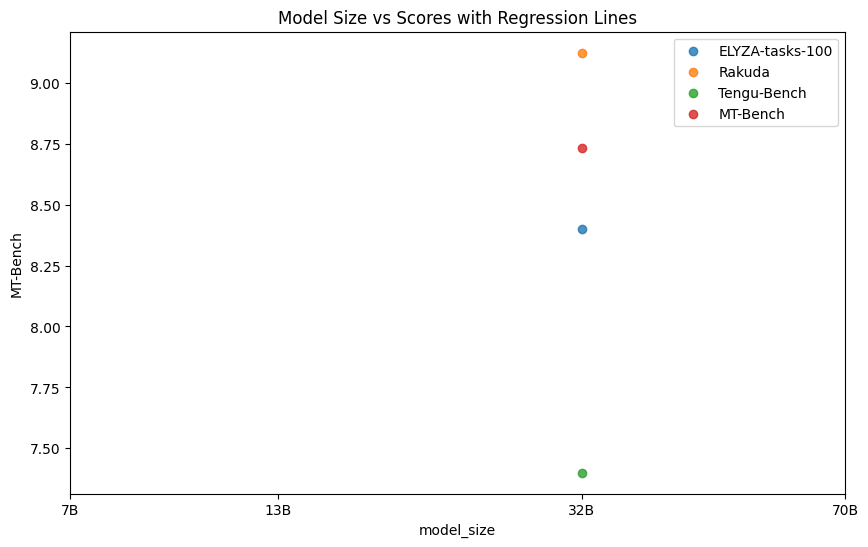

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 図のサイズを設定
plt.figure(figsize=(10, 6))

# データごとに違う色で散布図と回帰直線を描画
colors = ['blue', 'green', 'red', 'gold']  # 色を指定
for i, column in enumerate(['ELYZA-tasks-100', 'Rakuda', 'Tengu-Bench', 'MT-Bench']):
    sns.regplot(x='model_size', y=column, data=log_size_df, scatter=True, 
                label=column, ci=None, )


plt.xticks([log(7), log(13), log(32), log(70)], ["7B", "13B", "32B", "70B"])
# 凡例を表示
plt.legend()
# タイトルを設定
plt.title('Model Size vs Scores with Regression Lines')
# グラフを表示
# plt.savefig("model-size_vs_score.svg")
plt.show()


In [22]:
print(all_result_df[all_result_df['eval_dataset']=="Tengu-Bench"].groupby("Category").score.mean().sort_values(ascending=False).to_frame().to_latex())

\begin{tabular}{lr}
\toprule
 & score \\
Category &  \\
\midrule
アイデア生成 & 10.000000 \\
プロジェクト作成 & 10.000000 \\
会話要約 & 10.000000 \\
長い文書要約（千トークン以上） & 10.000000 \\
コスト見積 & 9.700000 \\
長い文書のClosed QA（千トークン以上） & 9.600000 \\
フォーマット & 9.400000 \\
抽出 & 9.300000 \\
敬語 & 9.000000 \\
雑談 & 8.700000 \\
表の読み取り & 8.700000 \\
翻訳 & 8.200000 \\
Function calling & 8.000000 \\
数学 & 7.500000 \\
政治 & 6.500000 \\
法律判断 & 6.400000 \\
ダジャレ & 6.100000 \\
ビジネス & 5.800000 \\
論理パズル & 5.100000 \\
倫理的制御 & 4.900000 \\
建設 & 4.800000 \\
日本 & 3.550000 \\
架空の質問 & 2.800000 \\
\bottomrule
\end{tabular}



In [23]:
all_result_df.groupby(
    ["model_name", "eval_dataset"]
).score.mean().reset_index(drop=False).pivot_table(values="score", index="model_name", columns="eval_dataset")

eval_dataset,ELYZA-tasks-100,MT-Bench,Rakuda,Tengu-Bench
model_name,,,,
shisa-v2-qwen2.5-32b,4.2,8.733333,9.125,7.4


In [24]:

mean_df = all_result_df.groupby(
    ["eval_dataset", "Category", "model_name"]
).score.mean().reset_index(level=1, drop=False).pivot_table(index='model_name', columns=['eval_dataset', 'Category'], values='score')


In [25]:
mean_df

eval_dataset              Tengu-Bench                                         \
Category             Function calling アイデア生成 コスト見積 ダジャレ ビジネス フォーマット プロジェクト作成   
model_name                                                                     
shisa-v2-qwen2.5-32b              8.0   10.0   9.7  6.1  5.8    9.4     10.0   

eval_dataset                           ...                                    \
Category              会話要約 倫理的制御   建設  ...   数学    日本 架空の質問 法律判断   翻訳 表の読み取り   
model_name                             ...                                     
shisa-v2-qwen2.5-32b  10.0   4.9  4.8  ...  7.5  3.55   2.8  6.4  8.2    8.7   

eval_dataset                                                             
Category             論理パズル 長い文書のClosed QA（千トークン以上） 長い文書要約（千トークン以上）   雑談  
model_name                                                               
shisa-v2-qwen2.5-32b   5.1                     9.6            10.0  8.7  

[1 rows x 23 columns]

In [26]:
print(mean_df.to_markdown(index=True, floatfmt='.2f'))

| model_name           |   ('Tengu-Bench', 'Function calling') |   ('Tengu-Bench', 'アイデア生成') |   ('Tengu-Bench', 'コスト見積') |   ('Tengu-Bench', 'ダジャレ') |   ('Tengu-Bench', 'ビジネス') |   ('Tengu-Bench', 'フォーマット') |   ('Tengu-Bench', 'プロジェクト作成') |   ('Tengu-Bench', '会話要約') |   ('Tengu-Bench', '倫理的制御') |   ('Tengu-Bench', '建設') |   ('Tengu-Bench', '抽出') |   ('Tengu-Bench', '政治') |   ('Tengu-Bench', '敬語') |   ('Tengu-Bench', '数学') |   ('Tengu-Bench', '日本') |   ('Tengu-Bench', '架空の質問') |   ('Tengu-Bench', '法律判断') |   ('Tengu-Bench', '翻訳') |   ('Tengu-Bench', '表の読み取り') |   ('Tengu-Bench', '論理パズル') |   ('Tengu-Bench', '長い文書のClosed QA（千トークン以上）') |   ('Tengu-Bench', '長い文書要約（千トークン以上）') |   ('Tengu-Bench', '雑談') |
|:---------------------|--------------------------------------:|----------------------------------:|--------------------------------:|------------------------------:|------------------------------:|----------------------------------:|--------------------------------------:|-----------------

In [27]:
mean_df

eval_dataset              Tengu-Bench                                         \
Category             Function calling アイデア生成 コスト見積 ダジャレ ビジネス フォーマット プロジェクト作成   
model_name                                                                     
shisa-v2-qwen2.5-32b              8.0   10.0   9.7  6.1  5.8    9.4     10.0   

eval_dataset                           ...                                    \
Category              会話要約 倫理的制御   建設  ...   数学    日本 架空の質問 法律判断   翻訳 表の読み取り   
model_name                             ...                                     
shisa-v2-qwen2.5-32b  10.0   4.9  4.8  ...  7.5  3.55   2.8  6.4  8.2    8.7   

eval_dataset                                                             
Category             論理パズル 長い文書のClosed QA（千トークン以上） 長い文書要約（千トークン以上）   雑談  
model_name                                                               
shisa-v2-qwen2.5-32b   5.1                     9.6            10.0  8.7  

[1 rows x 23 columns]

In [28]:
mean_df = all_result_df.groupby(
    ["model_name", "eval_dataset"]
).score.mean().reset_index(level=1, drop=False)

In [29]:
mean_df['score_'] = mean_df.apply(lambda x: x.score*2 if x.eval_dataset=="ELYZA-tasks-100" else x.score, axis=1)

In [30]:
unique_models = mean_df.index.unique()

In [31]:
import plotly.graph_objects as go
from plotly import offline

fig = go.Figure()

for unique_model in unique_models:
    
    model_mean_df = mean_df.loc[unique_model]
    
    fig.add_trace(go.Scatterpolar(
          r=model_mean_df["score_"],
          theta=model_mean_df["eval_dataset"],
          fill='toself',
          name=unique_model
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()
# offline.plot(fig)
